In [1]:
%tensorflow_version 2.x

!pip install mnist
import tensorflow
import numpy as np
import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Load dataset
train_images=mnist.train_images()
train_labels=mnist.train_labels()
test_images=mnist.test_images()
test_labels=mnist.test_labels()
train_flipped=255-train_images
test_flipped=255-test_images

In [ ]:
#Normalising the dataset
train_images=train_images/255
test_images=test_images/255
print(train_images.shape)

#Normalising the dataset

train_flipped=train_flipped/255
test_flipped=test_flipped/255
print(train_flipped.shape)
print(train_images.shape)


#New training and Testing Dataset with mixed images of black and white background
train_x=np.concatenate((train_images,train_flipped))
train_y=np.concatenate((train_labels,train_labels))
test_x=np.concatenate((test_images,test_flipped))
test_y=np.concatenate((test_labels,test_labels))


#train_flipped=train_flipped.reshape((-1,784))
#test_flipped=test_flipped.reshape((-1,784))
#Flattening the images
train_images=train_images.reshape((-1,784))
test_images=test_images.reshape((-1,784))
#Flattening the images
train_x=train_x.reshape((-1,784))
test_x=test_x.reshape((-1,784))

#Printing the Shape
print(train_x.shape)
print(test_x.shape)




#Printing the Shape
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(60000, 28, 28)
(60000, 784)


ValueError: ignored

Epoch 1/10
235/235 [==============================] - 1s 4ms/step - loss: 0.4860 - accuracy: 0.8666
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1962 - accuracy: 0.9438
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1476 - accuracy: 0.9578
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1223 - accuracy: 0.9642
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1023 - accuracy: 0.9700
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0879 - accuracy: 0.9748
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0764 - accuracy: 0.9776
Epoch 8/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0671 - accuracy: 0.9799
Epoch 9/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0594 - accuracy: 0.9826
Epoch 10/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0530 - accuracy: 0.9844

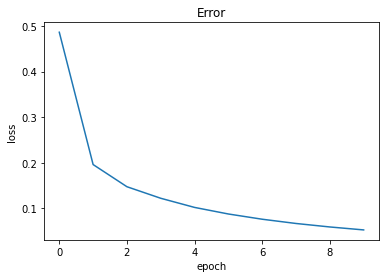

313/313 [==============================] - 0s 1ms/step - loss: 0.0866 - accuracy: 0.9738
[0.08663512766361237, 0.973800003528595]


In [ ]:

#Building the model
model=Sequential()
model.add(Dense(64,activation='relu', input_dim=784))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
#print(model)

#Compilation of model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Train the model
details=model.fit(train_images, to_categorical(train_labels), epochs=10 , batch_size=256 , shuffle=True)

plt.plot(details.history['loss'])
plt.title('Error')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Evaluate the model
eval=model.evaluate(test_images,to_categorical(test_labels))
print(eval)

In [ ]:
#Prediction on the dataset

predictions=model.predict(test_images[0:5])
print(predictions)
print(np.argmax(predictions,axis=1))
print(test_labels[:5])

[[1.65788799e-06 2.87593149e-09 9.29175803e-06 1.07517757e-04
  1.14708287e-08 3.36508788e-06 3.59606844e-10 9.99866486e-01
  3.27152384e-06 8.38426604e-06]
 [2.95798600e-06 2.30958394e-04 9.98716116e-01 1.03130052e-03
  3.52922885e-10 1.06246425e-05 1.29823249e-07 9.28521357e-11
  7.93353684e-06 1.51535978e-10]
 [1.85338558e-05 9.98199821e-01 1.39331751e-04 6.12205185e-05
  1.93216736e-04 1.33728809e-05 3.47288151e-05 9.82021913e-04
  3.00327200e-04 5.74559854e-05]
 [9.99926925e-01 1.02656772e-09 2.01963321e-05 5.65770328e-08
  9.08812303e-10 1.54959071e-05 1.77966604e-06 8.57907423e-07
  2.09063011e-09 3.46735360e-05]
 [9.06349851e-06 2.20383654e-07 1.96345190e-05 1.68797484e-07
  9.95423496e-01 1.02408444e-06 7.63743628e-06 2.45969495e-05
  5.42605630e-06 4.50877659e-03]]
[7 2 1 0 4]
[7 2 1 0 4]


In [ ]:

#Building the model
model1=Sequential()
model1.add(Dense(64,activation='relu', input_dim=784))
model1.add(Dense(64,activation='relu'))
model1.add(Dense(10,activation='softmax'))

#Compilation of model

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Train the model
details=model1.fit(train_x, to_categorical(train_y), epochs=20, batch_size=200)
plt.plot(details.history['loss'])
plt.title(' Error')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


ValueError: ignored

In [ ]:
#Prediction on the dataset

predictions=model.predict(test_x[0:5])
print(predictions)
print(np.argmax(predictions,axis=1))
print(test_y[:5])

[[2.8722727e-06 5.0096955e-06 1.0855476e-03 9.0017886e-04 1.6814596e-06
  9.2889529e-08 1.0239831e-08 9.9794739e-01 2.6460200e-05 3.0739571e-05]
 [2.7414027e-09 7.4132324e-05 9.9985874e-01 2.2795295e-05 1.8335879e-13
  4.3920438e-05 6.7328934e-08 4.1297573e-11 1.8196123e-07 1.4889964e-10]
 [1.6446527e-05 9.9074078e-01 2.2461715e-03 1.9140876e-04 2.9870938e-04
  1.2446930e-04 2.0216776e-04 4.2818841e-03 1.8816947e-03 1.6302656e-05]
 [9.9967957e-01 1.5337850e-05 9.2727561e-05 1.0156027e-05 3.2790042e-06
  8.1016096e-06 1.1287693e-04 7.7016935e-05 2.2119723e-07 7.8555956e-07]
 [6.1856168e-05 2.7391302e-06 8.4105202e-05 4.3214923e-06 9.9759465e-01
  5.5649019e-07 4.9869286e-05 4.5083728e-04 4.8507121e-05 1.7025141e-03]]
[7 2 1 0 4]
[7 2 1 0 4]


In [ ]:
#To see the image
for i in range(0,5):
  first_image=test_images[i]
  first_image=np.array(first_image, dtype='float')
  pixels=first_image.reshape((28,28))
  plt.imshow(pixels,cmap='gray')
  plt.show()